<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Data exploration</h1></center>

----------------------------

<center> <h1> Tresholding data for class balance </h1> </center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")
import utils

## Loading data

In [2]:
data = utils.load_data("../data/for_learning_plus/CI02.npy")
data['Y'] = data['Y'].astype(object)

## Description of variables

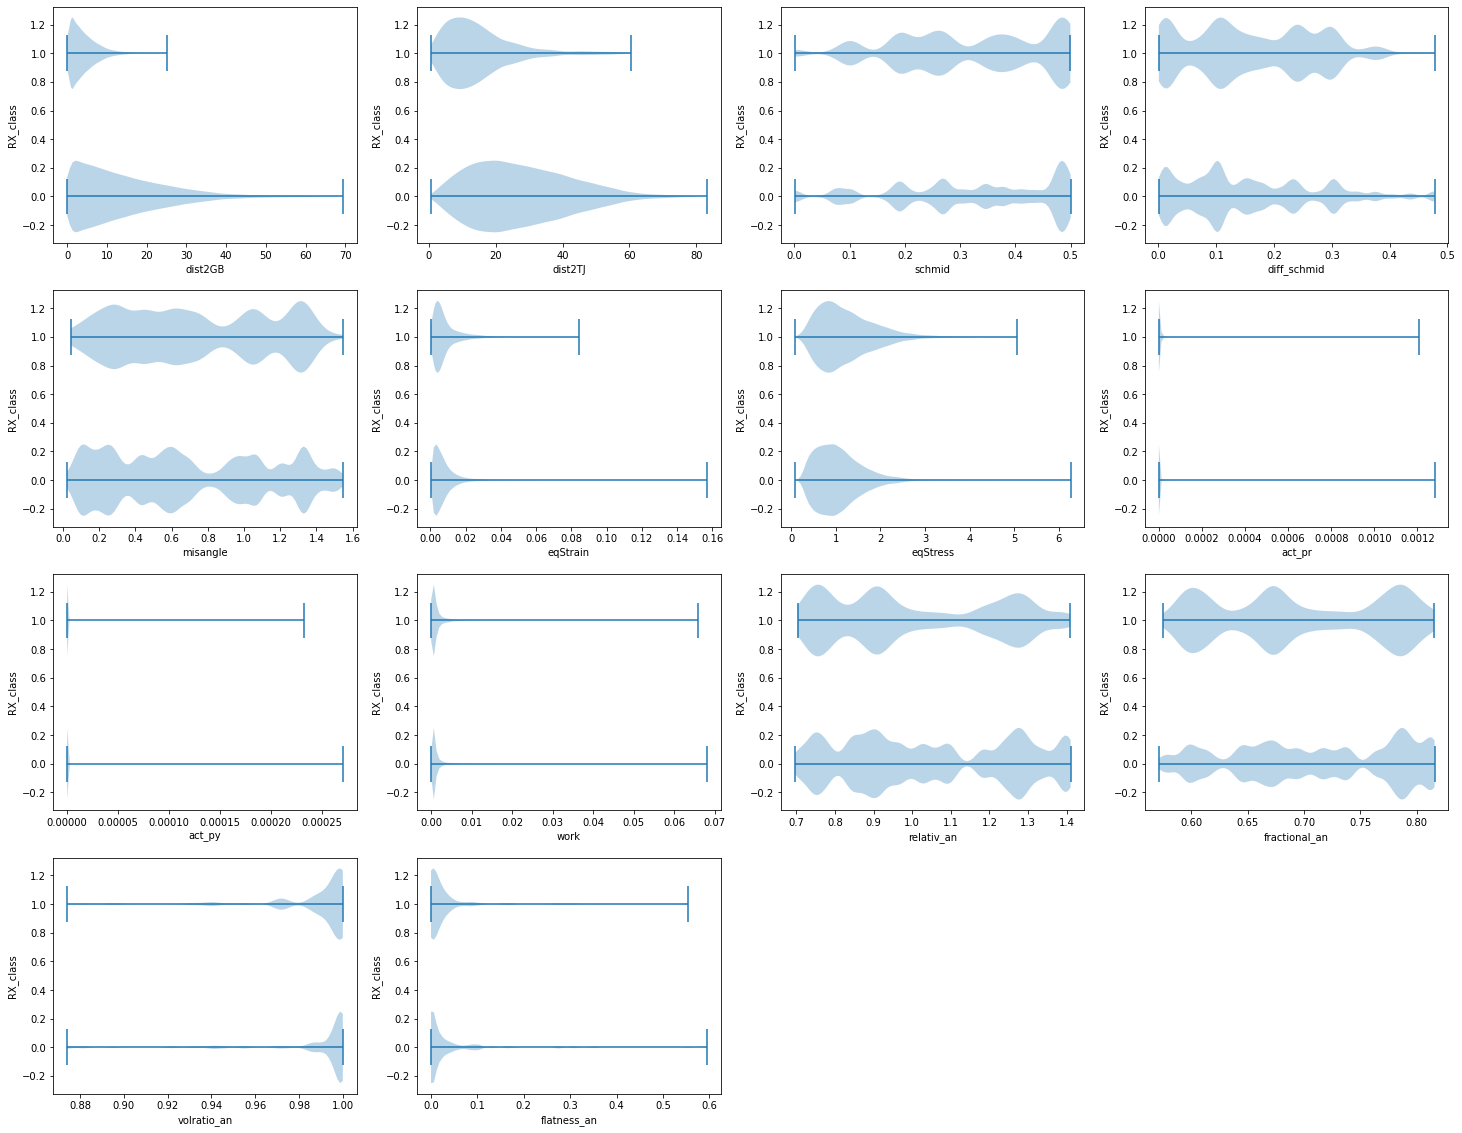

In [3]:
plt.figure(figsize=(25,20))
c = 1
for i in data.columns[1:]:
    plt.subplot(4,4,c)
    #plt.boxplot((data.loc[(data.Y==1),i],data.loc[(data.Y==0),i]),vert=False,flierprops=dict(markerfacecolor='k', marker='.',linewidth=0.1),widths=0.5,positions=[1,0])
    plt.violinplot((data.loc[(data.Y==1),i],data.loc[(data.Y==0),i]),vert=False,positions=[1,0])
    plt.xlabel(i)
    plt.ylabel("RX_class")
    c += 1

## Threshold on dist2GB

In [4]:
nb_crist = []
nb_ech = []
nb_tot = np.shape(data)[0]
x = list(range(70,0,-5))

nb_1 = len(data.loc[(data.Y==1),"Y"])
nb_0 = len(data.loc[(data.Y==0),"Y"])

for seuil in x :
    nb_crist.append(np.shape(data[(data["dist2GB"] < seuil ) & (data["Y"]==1)])[0])
    nb_ech.append(np.shape(data[(data["dist2GB"] < seuil)])[0])

pd.DataFrame(np.matrix((x,nb_ech,nb_crist,100*np.array(nb_crist)/np.array(nb_ech),-(1-(np.array(nb_crist)/nb_1))*100,-(1-((np.array(nb_ech)-np.array(nb_crist))/nb_0))*100)).T,columns=["dist2GB <","nb_sample","nb_crist","proportion of 1%)","1 lost (%)","0 lost (%)"])

dist2GB <  nb_sample  nb_crist  proportion of 1%)  1 lost (%)  0 lost (%)
0        70.0   255840.0   11449.0           4.475063   -0.000000   -0.000000
1        65.0   255650.0   11449.0           4.478388   -0.000000   -0.077744
2        60.0   255028.0   11449.0           4.489311   -0.000000   -0.332254
3        55.0   253891.0   11449.0           4.509415   -0.000000   -0.797493
4        50.0   252335.0   11449.0           4.537222   -0.000000   -1.434177
5        45.0   250095.0   11449.0           4.577860   -0.000000   -2.350741
6        40.0   246441.0   11449.0           4.645737   -0.000000   -3.845886
7        35.0   240282.0   11449.0           4.764818   -0.000000   -6.366028
8        30.0   229682.0   11449.0           4.984718   -0.000000  -10.703340
9        25.0   213410.0   11448.0           5.364322   -0.008734  -17.361114
10       20.0   191308.0   11416.0           5.967341   -0.288235  -26.391725
11       15.0   161208.0   11297.0           7.007717   -1.327627  -38.659361
12       10.0   121090.0   10618.0           8.768684   -7.258276  -54.797026
13        5.0    64756.0    7428.0          11.470752  -35.120971  -76.542508

## Threshold on dist2TJ

In [5]:
nb_crist = []
nb_ech = []
nb_tot = np.shape(data)[0]
x = list(range(70,0,-5))

nb_1 = len(data.loc[(data.Y==1),"Y"])
nb_0 = len(data.loc[(data.Y==0),"Y"])

for seuil in x :
    nb_crist.append(np.shape(data[(data["dist2TJ"] < seuil ) & (data["Y"]==1)])[0])
    nb_ech.append(np.shape(data[(data["dist2TJ"] < seuil)])[0])

pd.DataFrame(np.matrix((x,nb_ech,nb_crist,100*np.array(nb_crist)/np.array(nb_ech),-(1-(np.array(nb_crist)/nb_1))*100,-(1-((np.array(nb_ech)-np.array(nb_crist))/nb_0))*100)).T,columns=["dist2TJ <","nb_sample","nb_crist","proportion of 1%)","1 lost (%)","0 lost (%)"])

dist2TJ <  nb_sample  nb_crist  proportion of 1%)  1 lost (%)  0 lost (%)
0        70.0   254187.0   11449.0           4.504164   -0.000000   -0.676375
1        65.0   252383.0   11449.0           4.536359   -0.000000   -1.414537
2        60.0   249323.0   11448.0           4.591634   -0.008734   -2.666219
3        55.0   243571.0   11379.0           4.671738   -0.611407   -4.991591
4        50.0   234209.0   11264.0           4.809380   -1.615862   -8.775282
5        45.0   221152.0   11125.0           5.030477   -2.829941  -14.061074
6        40.0   203728.0   10993.0           5.395920   -3.982881  -21.136621
7        35.0   182023.0   10764.0           5.913538   -5.983055  -29.924179
8        30.0   156567.0   10424.0           6.657853   -8.952747  -40.201153
9        25.0   127999.0    9782.0           7.642247  -14.560224  -51.627924
10       20.0    95440.0    8749.0           9.167016  -23.582846  -64.527744
11       15.0    61859.0    6944.0          11.225529  -39.348415  -77.529860
12       10.0    30292.0    4267.0          14.086227  -62.730369  -89.351081
13        5.0     8208.0    1494.0          18.201754  -86.950825  -97.252763

## Subdatasets

Text(0, 0.5, 'Distance to TJ')

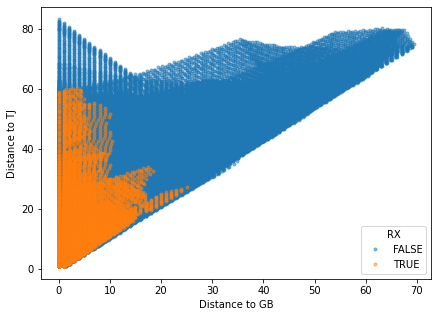

In [31]:
plt.figure(figsize=(7,5))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.legend(["FALSE",'TRUE'],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")

In [6]:
sub_data = data[(data["dist2GB"] < 30) & (data["dist2TJ"] < 60)]

nb_ech = np.shape(sub_data)[0]
nb_crist = np.shape(sub_data[sub_data["Y"]==1])[0]
nb_tot = np.shape(data)[0]
nb_tot_crist = np.shape(data[data["Y"]==1])[0]
prop = 100*np.array(nb_crist)/np.array(nb_ech)
print("taille du subdataset :",nb_ech)
print("nombre de pixels Y = 1 :",nb_crist)
print("perte de 0 :",((nb_ech-nb_crist)-(nb_tot-nb_tot_crist))/(nb_tot-nb_tot_crist)*100, "%")
print("perte de 1 :",(nb_crist-nb_tot_crist)/nb_tot_crist*100,"%")
print("proportion de 1 : ",prop,"%")

taille du subdataset : 228134
nombre de pixels Y = 1 : 11448
perte de 0 : -11.336342172993277 %
perte de 1 : -0.008734387282732117 %
proportion de 1 :  5.018103395372895 %


Text(0, 0.5, 'Distance to TJ')

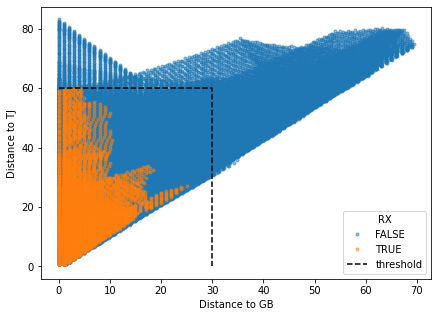

In [32]:
plt.figure(figsize=(7,5))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.plot([0,30,30],[60,60,0],"--k")
plt.legend(["FALSE",'TRUE',"threshold"],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")

In [7]:
sub_data2 = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

nb_ech = np.shape(sub_data2)[0]
nb_crist = np.shape(sub_data2[sub_data2["Y"]==1])[0]
nb_tot = np.shape(data)[0]
nb_tot_crist = np.shape(data[data["Y"]==1])[0]
prop = 100*np.array(nb_crist)/np.array(nb_ech)
print("taille du subdataset :",nb_ech)
print("nombre de pixels Y = 1 :",nb_crist)
print("perte de 0 :",((nb_ech-nb_crist)-(nb_tot-nb_tot_crist))/(nb_tot-nb_tot_crist)*100, "%")
print("perte de 1 :",(nb_crist-nb_tot_crist)/nb_tot_crist*100,"%")
print("proportion de 1 : ",prop,"%")

taille du subdataset : 162114
nombre de pixels Y = 1 : 11263
perte de 0 : -38.27473188456204 %
perte de 1 : -1.6245960345881736 %
proportion de 1 :  6.947580097955759 %


Text(0, 0.5, 'Distance to TJ')

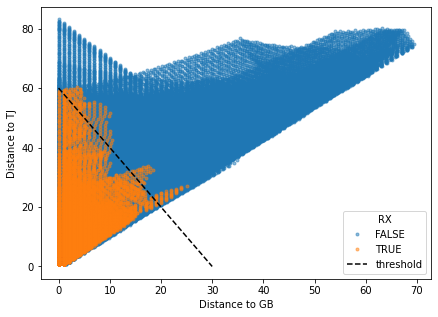

In [29]:
plt.figure(figsize=(7,5))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.plot([0,30],[60,0],"--k")
plt.legend(["FALSE",'TRUE',"threshold"],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")